<a href="https://colab.research.google.com/github/Mateus0808/join_data_frame_covid19/blob/main/join_data_frame_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install matplotlib==3.3.2

     |████████████████████████████████| 11.6MB 2.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:
      Successfully uninstalled matplotlib-3.1.0


In [51]:
import pandas as pd
import matplotlib.pyplot as plt 

In [83]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
google = pd.read_csv(link)
apple = pd.read_csv("applemobilitytrends-2020-10-16.csv") 


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
google.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [84]:
plt.style.use("fivethirtyeight")

In [85]:
apple_mod = apple.melt(id_vars=["geo_type", "region", "transportation_type", "alternative_name", 
                                "sub-region", "country"], var_name="date", value_name="value")

In [86]:
apple_mod.date = pd.to_datetime(apple_mod.date)
apple_mod.index=apple_mod.date
apple_mod.drop(labels="date", axis=1, inplace=True)

In [87]:
google_br = google.loc[google.country_region == "Brazil",:].iloc[:,[1,2,7,11]].copy()
google_br.columns = ["country", "state", "date", "transit"]

In [88]:
apple_br = apple_mod.loc[apple_mod.country == "Brazil",:].iloc[:,[4,5,6]].copy()
apple_br.columns = ["state", "country", "transit"] 

In [89]:
google_br.date = pd.to_datetime(google_br.date)
google_br.index=google_br.date
google_br.drop(labels="date", axis=1, inplace=True)

In [90]:
apple_br_state = apple_br.loc[~apple_br.state.isnull()].copy()
google_br_state = google_br.loc[~google_br.state.isnull()].copy()

In [68]:
google_br_state.state.unique()

array(['Federal District', 'State of Acre', 'State of Alagoas',
       'State of Amapá', 'State of Amazonas', 'State of Bahia',
       'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
       'State of Maranhão', 'State of Mato Grosso',
       'State of Mato Grosso do Sul', 'State of Minas Gerais',
       'State of Pará', 'State of Paraíba', 'State of Paraná',
       'State of Pernambuco', 'State of Piauí', 'State of Rio de Janeiro',
       'State of Rio Grande do Norte', 'State of Rio Grande do Sul',
       'State of Rondônia', 'State of Roraima', 'State of Santa Catarina',
       'State of São Paulo', 'State of Sergipe', 'State of Tocantins'],
      dtype=object)

In [69]:
apple_br_state.state.unique()

array(['Minas Gerais', 'Paraná', 'Ceará', 'Goiás', 'Rio Grande do Sul',
       'Rio de Janeiro (state)', 'São Paulo (state)'], dtype=object)

In [91]:
google_br_state.state = google_br_state.state.str.replace("State of ","")
apple_br_state.state = apple_br_state.state.replace({'Rio de Janeiro (state)':'Rio de Janeiro', 
                                                     'São Paulo (state)': 'São Paulo'})

In [28]:
apple_br_state.head()

,state,country,transit
date,,,
2020-01-13,Minas Gerais,Brazil,100.0
2020-01-13,Minas Gerais,Brazil,100.0
2020-01-13,Paraná,Brazil,100.0
2020-01-13,Paraná,Brazil,100.0
2020-01-13,Ceará,Brazil,100.0


In [79]:
apple_br_state.head()

,state,country,transit
date,,,
2020-01-13,Minas Gerais,Brazil,100.0
2020-01-13,Minas Gerais,Brazil,100.0
2020-01-13,Paraná,Brazil,100.0
2020-01-13,Paraná,Brazil,100.0
2020-01-13,Ceará,Brazil,100.0


In [92]:
data_all_state = pd.concat([google_br_state, apple_br_state], axis=0)
data_all_state

,country,state,transit
date,,,
2020-02-15,Brazil,Federal District,8.00
2020-02-16,Brazil,Federal District,4.00
2020-02-17,Brazil,Federal District,11.00
2020-02-18,Brazil,Federal District,14.00
2020-02-19,Brazil,Federal District,9.00
...,...,...,...
2020-10-16,Brazil,Rio de Janeiro,60.87
2020-10-16,Brazil,Rio de Janeiro,80.68
2020-10-16,Brazil,São Paulo,104.44


In [30]:
data_all_state.state.unique()

array(['Federal District', 'Acre', 'Alagoas', 'Amapá', 'Amazonas',
       'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [93]:
data_unstacking = data_all_state.groupby(by=[data_all_state.index, "state"]).mean().unstack()

In [ ]:
data_unstacking

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator


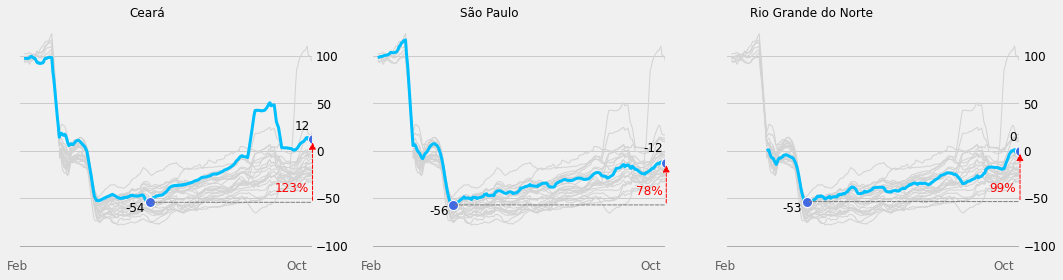

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

item = "transit" 
states = ["Ceará", "São Paulo", "Rio Grande do Norte"]

for i,state in enumerate(states):

  data_unstacking[item].rolling(window=7).mean().plot(legend=False, color="#D3D3D3", linewidth=1, alpha=1, ax=ax[i])
  data_unstacking[item][state].rolling(window=7).mean().plot(legend=False, color="#00BFFF", linewidth=3, alpha=1, ax=ax[i]) 
  
  min = data_unstacking[item][state].rolling(window=7).mean().min()
  minFormat = int(min)
  minDate = data_unstacking[item][state].rolling(window=7).mean().idxmin()

  maxDate  = data_unstacking[item][state].loc[~data_unstacking[item][state].isnull()].rolling(window=7).mean().index.max()
  stateValue = data_unstacking[item][state].loc[~data_unstacking[item][state].isnull()].rolling(window=7).mean().tail(1).values[0]
  intStateValue = int(stateValue)

  statePercentage =  abs((float(stateValue)-float(min))/float(min) * 100.0)
  statePercentage = "{:.0f}%".format(statePercentage)

  ax[i].plot([minDate, maxDate], [min, stateValue], 'o', markerfacecolor='#4169E1', markersize=10, markeredgecolor="white")

  ax[i].annotate(minFormat, xy=(minDate, min), xycoords="data", ha="right",  xytext=(-5, -10), textcoords='offset points', size=12)

  ax[i].annotate("", xy=(maxDate, intStateValue-1), xycoords='data', xytext=(maxDate, min), textcoords='data',
            arrowprops=dict(arrowstyle="-|>", linestyle="--", linewidth=1, color="red"))


  ax[i].annotate(intStateValue, xy=(maxDate, intStateValue), xycoords="data", ha="right", xytext=(-3, 10), textcoords='offset points', size=12)

  ax[i].annotate(statePercentage, xy=(maxDate, min), xycoords="data", ha="right", xytext=(-4, 10), textcoords='offset points', size=12, color="red")

  ax[i].annotate("", xy=(minDate, min), xycoords='data', xytext=(maxDate, min), textcoords='data', 
            arrowprops=dict(arrowstyle="-", linestyle="--", linewidth=1, color="grey"))

  ax[i].axhline(-100, linewidth=1, color="grey", alpha=0.4)

  ax[i].set_title(state, fontsize=12, ha='right')

  ax[i].xaxis.grid(False)
  ax[i].set_xlabel("")

  ax[i].set_xticklabels(["Feb", None, None, None, None, None, None, None, None, "Oct"], alpha= 0.6)
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)
  
  if (i==0) or (i==2):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])


plt.savefig("states", dpi=300)
plt.show()

In [ ]:
data_unstackingAppe = apple_br_state.groupby(by=[apple_br_state.index, "state"]).mean().unstack()
data_unstackingGoogle = google_br_state.groupby(by=[google_br_state.index, "state"]).mean().unstack()

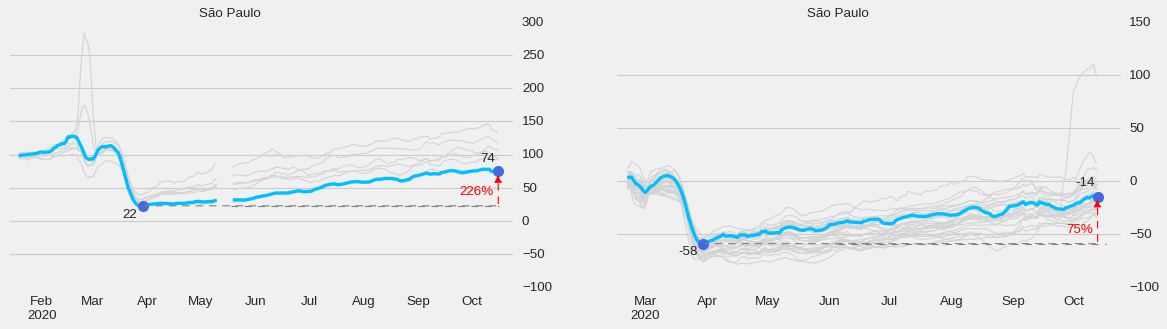

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

item = "transit"
data_unstacking = [data_unstackingAppe, data_unstackingGoogle]

for i,data_unstack in enumerate(data_unstacking):

  data_unstack[item].rolling(window=7).mean().plot(legend=False, color="#D3D3D3", linewidth=1, alpha=1, ax=ax[i])
  data_unstack[item]["São Paulo"].rolling(window=7).mean().plot(legend=False, color="#00BFFF", linewidth=3, alpha=1, ax=ax[i]) 
  
  min = data_unstack[item]["São Paulo"].rolling(window=7).mean().min()
  minFormat = int(min)
  minDate = data_unstack[item]["São Paulo"].rolling(window=7).mean().idxmin()

  maxDate  = data_unstack[item]["São Paulo"].loc[~data_unstack[item]["São Paulo"].isnull()].rolling(window=7).mean().index.max()
  stateValue = data_unstack[item]["São Paulo"].loc[~data_unstack[item]["São Paulo"].isnull()].rolling(window=7).mean().tail(1).values[0]
  intStateValue = int(stateValue)

  statePercentage =  abs((float(stateValue)-float(min))/float(min) * 100.0)
  statePercentage = "{:.0f}%".format(statePercentage)

  ax[i].plot([minDate, maxDate], [min, stateValue], 'o', markerfacecolor='#4169E1', markersize=10, markeredgecolor="white")

  ax[i].annotate(minFormat, xy=(minDate, min), xycoords="data", ha="right",  xytext=(-5, -10), textcoords='offset points', size=12)

  ax[i].annotate("", xy=(maxDate, intStateValue-1), xycoords='data', xytext=(maxDate, min), textcoords='data',
            arrowprops=dict(arrowstyle="-|>", linestyle="--", linewidth=1, color="red"))


  ax[i].annotate(intStateValue, xy=(maxDate, intStateValue), xycoords="data", ha="right", xytext=(-3, 10), textcoords='offset points', size=12)

  ax[i].annotate(statePercentage, xy=(maxDate, min), xycoords="data", ha="right", xytext=(-4, 10), textcoords='offset points', size=12, color="red")

  ax[i].set_xlim(right=18560)
  ax[i].axhline(min, xmin=0.44, xmax=0.97, linestyle="--", linewidth=1, color="grey")
  ax[i].axhline(-100, linewidth=1, color="grey", alpha=0.4)

  ax[i].set_title("São Paulo", fontsize=12, ha='right')

  ax[i].xaxis.grid(False)
  ax[i].set_xlabel("")

  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)
  
  if (i==0) or (i==1):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])


plt.savefig("states", dpi=300)
plt.show()